<a href="https://colab.research.google.com/github/xhesikam/WebtoonDataProject/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt

In [3]:
import kagglehub

path = kagglehub.dataset_download("iridazzle/webtoon-originals-datasets")

print("Path to dataset files:", path)

100%|██████████| 1.73M/1.73M [00:01<00:00, 1.58MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/iridazzle/webtoon-originals-datasets/versions/31


In [4]:
import pandas as pd
df = pd.read_csv("/root/.cache/kagglehub/datasets/iridazzle/webtoon-originals-datasets/versions/31/webtoon_originals_en.csv")
df.head()

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,synopsis
0,9053,The Knight of the Sightless Sky,ROMANCE,moni,TUESDAY,3,9799,0.0,35868,2117,ONGOING,"A consuming fire, a dead king, and a family in..."
1,9013,The Return of the Disaster-Class Hero,ACTION,"BGman(REDICE STUDIO),HEATS(REDICE STUDIO),SAN.G","TUESDAY,THURSDAY,SUNDAY",4,56025,0.0,355915,23724,ONGOING,"Twenty years. For twenty long years, the thirt..."
2,8998,Born to be the Grand Duchess,ROMANCE,"LICO,CHYAMI,LECHIMONA",SATURDAY,3,53792,0.0,215518,13838,ONGOING,Annette Fraise was supposed to die as the nove...
3,8997,Protect the Fake Saintess!,ROMANCE,Narion,WEDNESDAY,3,31793,0.0,133226,11547,ONGOING,"Dana, a Korean high school senior just days aw..."
4,8996,The Top Assassin in Another World,ACTION,"amamiya kazuki,akym",TUESDAY,3,35795,0.0,150316,7668,ONGOING,"Kai Shinjo, an ordinary high school student by..."


In [5]:
df.describe() #no missing values

,title_id,length,subscribers,rating,views,likes
count,1777.000000,1777.000000,1.777000e+03,1777.0,1.777000e+03,1.777000e+03
mean,4624.257175,59.577940,3.565176e+05,0.0,2.957990e+07,2.297649e+06
std,2543.582030,101.739702,5.838013e+05,0.0,9.238587e+07,5.853980e+06
min,64.000000,1.000000,6.363000e+03,0.0,2.121300e+04,1.495000e+03
25%,2605.000000,7.000000,8.056900e+04,0.0,1.983229e+06,1.887330e+05
50%,4678.000000,27.000000,1.688070e+05,0.0,5.917752e+06,5.493130e+05
75%,6853.000000,71.000000,3.767950e+05,0.0,1.993790e+07,1.884031e+06
max,9053.000000,1410.000000,7.516896e+06,0.0,1.418216e+09,7.702175e+07


In [6]:
df = df.drop_duplicates()
len(df) #no duplicates

1777

In [7]:
df["weekdays"].unique()

array(['TUESDAY', 'TUESDAY,THURSDAY,SUNDAY', 'SATURDAY', 'WEDNESDAY',
       'SUNDAY', 'FRIDAY', 'MONDAY', 'THURSDAY',
       'MONDAY,WEDNESDAY,FRIDAY', 'TUESDAY,THURSDAY,SATURDAY',
       'WEDNESDAY,FRIDAY', 'WEDNESDAY,SATURDAY', 'THURSDAY,SUNDAY',
       'MONDAY,THURSDAY', 'WEDNESDAY,FRIDAY,SUNDAY', 'MONDAY,FRIDAY',
       'TUESDAY,FRIDAY', 'TUESDAY,SATURDAY',
       'MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY',
       'MONDAY,THURSDAY,SATURDAY', 'WEDNESDAY,SUNDAY',
       'MONDAY,TUESDAY,WEDNESDAY,THURSDAY,SUNDAY',
       'WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY', 'THURSDAY,SATURDAY',
       'MONDAY,SATURDAY', 'TUESDAY,THURSDAY', 'MONDAY,SUNDAY',
       'MONDAY,SATURDAY,SUNDAY', 'WEDNESDAY,THURSDAY',
       'TUESDAY,FRIDAY,SUNDAY', 'TUESDAY,SUNDAY', 'SATURDAY,SUNDAY',
       'THURSDAY,FRIDAY', 'TUESDAY,WEDNESDAY,THURSDAY,FRIDAY',
       'FRIDAY,SATURDAY', 'MONDAY,TUESDAY,FRIDAY', 'MONDAY,TUESDAY',
       'TUESDAY,WEDNESDAY', 'FRIDAY,SATURDAY,SUNDAY', 'MONDAY,WEDNESDA

In [8]:
df.dtypes
df["weekdays"] = df["weekdays"].astype("string")
df.dtypes

,0
title_id,int64
title,object
genre,object
authors,object
weekdays,string[python]
length,int64
subscribers,int64
rating,float64
views,int64
likes,int64


In [9]:
def day_fun(x):
     parts = x.split(",")
    #  print("parts:", parts)
    #  print("lenght:", len(parts))
     if len(parts) > 1:
        return "MULTIDAYS"
     else:
        return parts[0]

In [10]:
df["days"] = df["weekdays"].apply(day_fun)
df["days"].unique()

array(['TUESDAY', 'MULTIDAYS', 'SATURDAY', 'WEDNESDAY', 'SUNDAY',
       'FRIDAY', 'MONDAY', 'THURSDAY'], dtype=object)

Choose 4 columns and do the following for each of these columns:
Plot the distribution of data in that column using an appropriate graph type.
Add a title and axes labels to the plot.
Add the plot to your webpage and write several sentences telling the reader what they should notice about the plot (ex. shape of distribution, outliers, skew, anything surprising, etc)


Text(0, 0.5, 'Count')

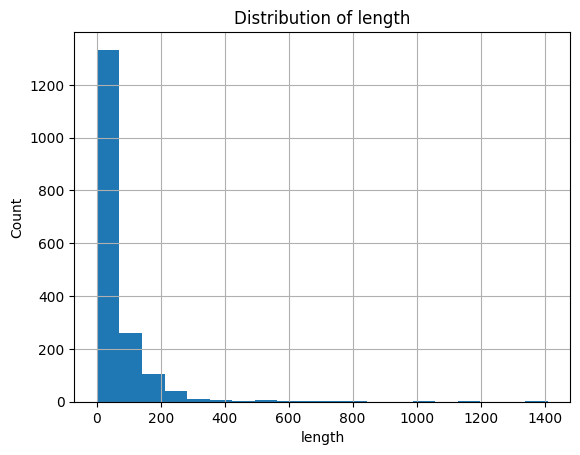

In [11]:
df["length"].hist(bins=20)
plt.title('Distribution of length')
plt.xlabel('length')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

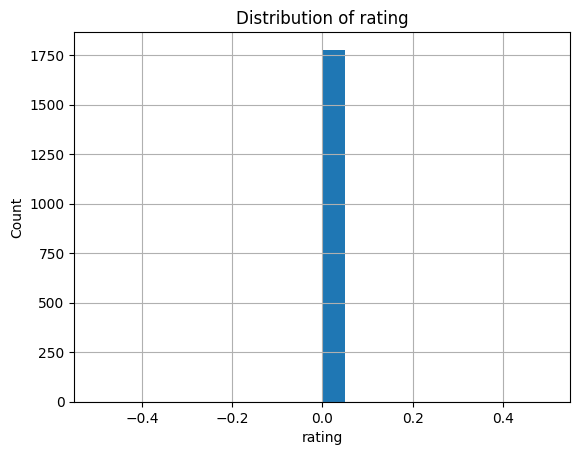

In [12]:
df["rating"].hist(bins=20)
plt.title('Distribution of rating')
plt.xlabel('rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

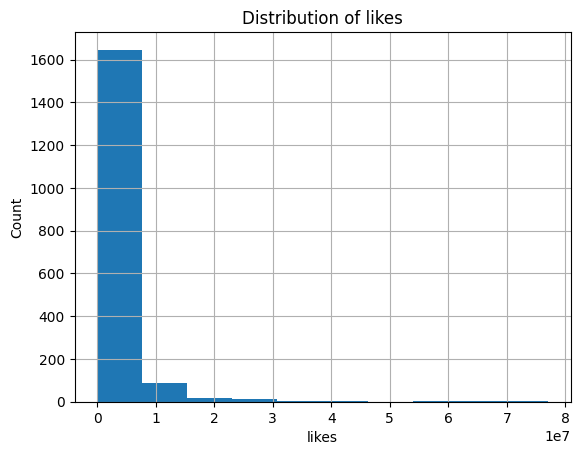

In [13]:
df["likes"].hist()
plt.title('Distribution of likes')
plt.xlabel('likes')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

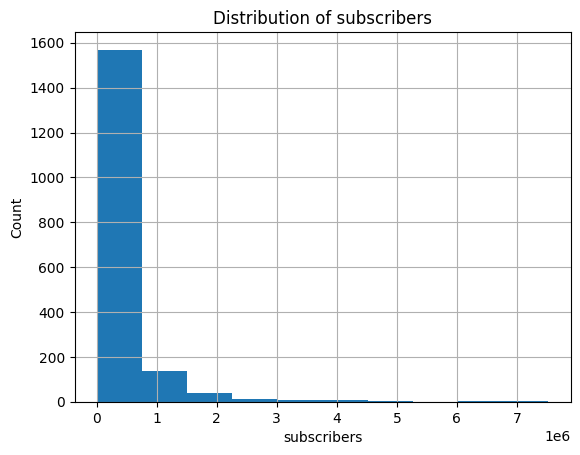

In [14]:
df["subscribers"].hist()
plt.title('Distribution of subscribers')
plt.xlabel('subscribers')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

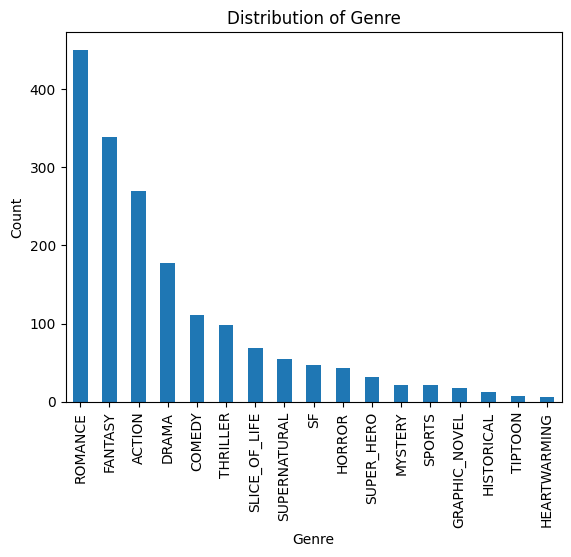

In [15]:
genre_counts = df['genre'].value_counts()
genre_counts.plot(kind='bar')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

Create 2 plots by doing the following for each:
Choose two or more columns/variables, and create a plot visualizing their relationship.
Add a title and axes labels to the plot.
Add the plot to your webpage and write several sentences telling the reader what they should notice or conclude from this plot.


Text(0.5, 1.0, 'Subscribers vs views')

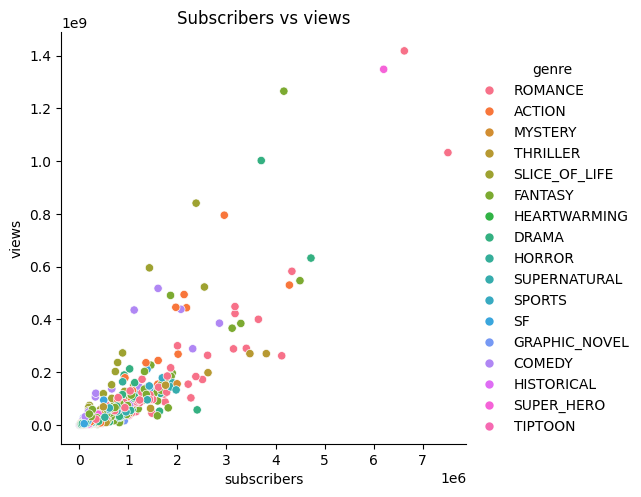

In [16]:
import seaborn as sns
sns.relplot(x="subscribers", y = "views", hue="genre",data=df)
plt.title('Subscribers vs views')

Text(0.5, 1.0, 'Total Views by Genre')

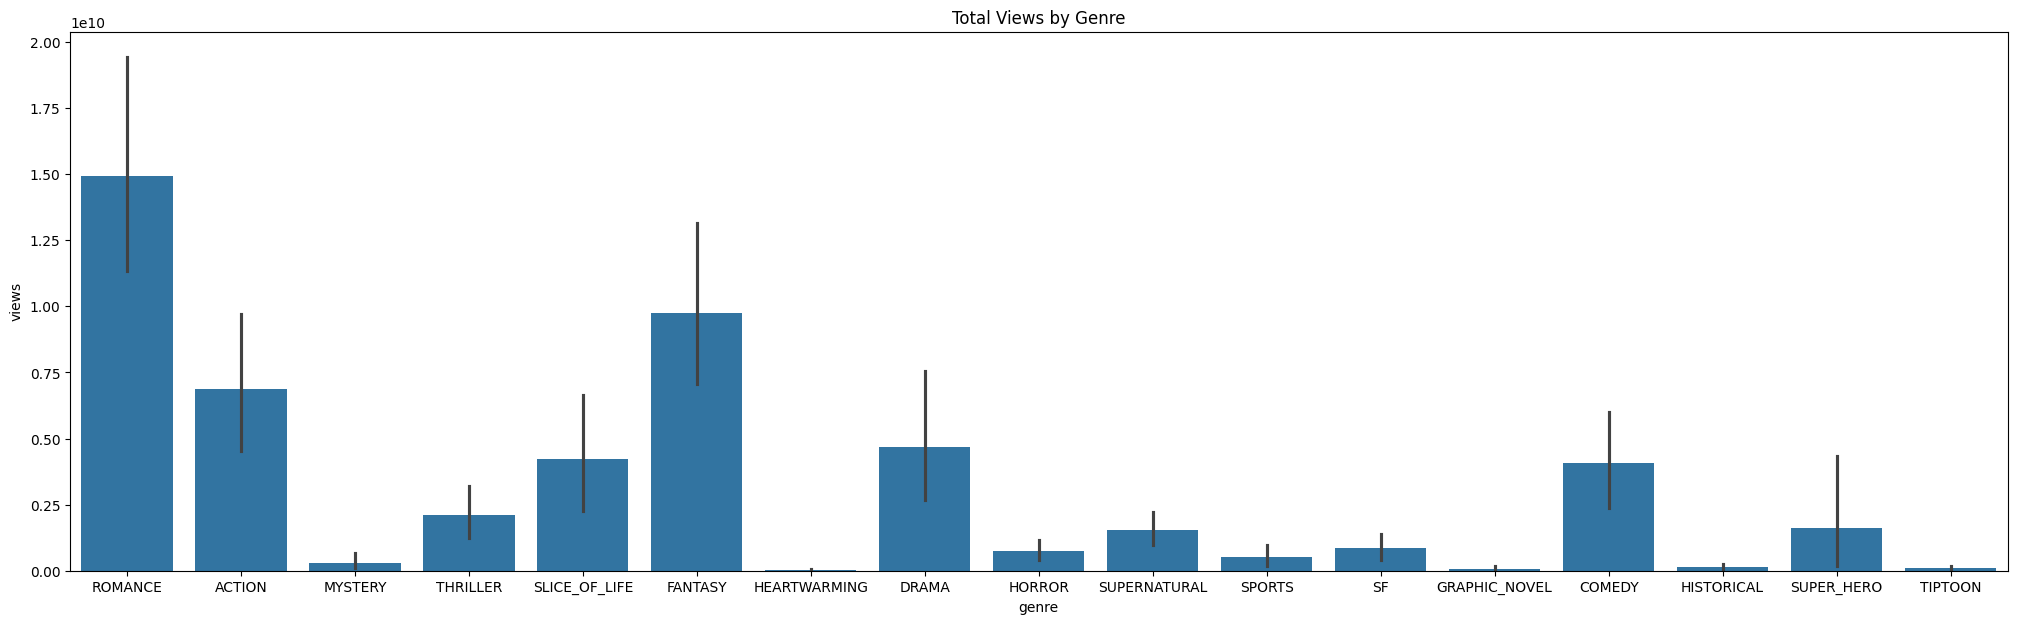

In [17]:
plt.figure(figsize=(25,7))
sns.barplot(x="genre", y="views", data=df, estimator = sum)
plt.title("Total Views by Genre")



In [18]:
import statsmodels.formula.api as smf
df2  = pd.get_dummies(df, columns = ["genre", "days", "status"],drop_first=True)
df2.head(2)

,title_id,title,authors,weekdays,length,subscribers,rating,views,likes,synopsis,...,genre_TIPTOON,days_MONDAY,days_MULTIDAYS,days_SATURDAY,days_SUNDAY,days_THURSDAY,days_TUESDAY,days_WEDNESDAY,status_HIATUS,status_ONGOING
0,9053,The Knight of the Sightless Sky,moni,TUESDAY,3,9799,0.0,35868,2117,"A consuming fire, a dead king, and a family in...",...,False,False,False,False,False,False,True,False,False,True
1,9013,The Return of the Disaster-Class Hero,"BGman(REDICE STUDIO),HEATS(REDICE STUDIO),SAN.G","TUESDAY,THURSDAY,SUNDAY",4,56025,0.0,355915,23724,"Twenty years. For twenty long years, the thirt...",...,False,False,True,False,False,False,False,False,False,True


In [19]:
df2.columns

Index(['title_id', 'title', 'authors', 'weekdays', 'length', 'subscribers',
       'rating', 'views', 'likes', 'synopsis', 'genre_COMEDY', 'genre_DRAMA',
       'genre_FANTASY', 'genre_GRAPHIC_NOVEL', 'genre_HEARTWARMING',
       'genre_HISTORICAL', 'genre_HORROR', 'genre_MYSTERY', 'genre_ROMANCE',
       'genre_SF', 'genre_SLICE_OF_LIFE', 'genre_SPORTS', 'genre_SUPERNATURAL',
       'genre_SUPER_HERO', 'genre_THRILLER', 'genre_TIPTOON', 'days_MONDAY',
       'days_MULTIDAYS', 'days_SATURDAY', 'days_SUNDAY', 'days_THURSDAY',
       'days_TUESDAY', 'days_WEDNESDAY', 'status_HIATUS', 'status_ONGOING'],
      dtype='object')

In [20]:
#linea
linear_model = smf.ols("subscribers ~ length + views + likes \
    + genre_COMEDY + genre_DRAMA + genre_FANTASY \
    + genre_GRAPHIC_NOVEL + genre_HEARTWARMING + genre_HISTORICAL \
    + genre_HORROR + genre_MYSTERY + genre_ROMANCE + genre_SF \
    + genre_SLICE_OF_LIFE + genre_SPORTS + genre_SUPERNATURAL \
    + genre_SUPER_HERO + genre_THRILLER + genre_TIPTOON \
    + days_MONDAY + days_MULTIDAYS + days_SATURDAY \
    + days_SUNDAY + days_THURSDAY + days_TUESDAY + days_WEDNESDAY \
    + status_HIATUS + status_ONGOING ",data=df2).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subscribers   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     245.3
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:06:10   Log-Likelihood:                -24698.
No. Observations:                1777   AIC:                         4.945e+04
Df Residuals:                    1748   BIC:                         4.961e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.551e+05   2.39e+04      6.494      0.000    1.08e+05    2.02e+05
genre_COMEDY[T.True]        -1.347e+04   3.24e+04     -0.415      0.678   -7.71e+04    5.01e+04
genre_DRAMA[T.True]          2.542e+04    2.6e+04      0.978      0.328   -2.56e+04    7.64e+04
genre_FANTASY[T.True]        6.616e+04   2.18e+04      3.033      0.002    2.34e+04    1.09e+05
genre_GRAPHIC_NOVEL[T.True] -3.021e+04   6.51e+04     -0.464      0.643   -1.58e+05    9.75e+04
genre_HEARTWARMING[T.True]  -1.758e+04    1.1e+05     -0.160      0.873   -2.33e+05    1.98e+05
genre_HISTORICAL[T.True]     3.217e+04   7.83e+04      0.411      0.681   -1.21e+05    1.86e+05
genre_HORROR[T.True]         4.825e+04    4.4e+04      1.096      0.273   -3.81e+04    1.35e+05
genre_MYSTERY[T.True]       -2.002e+04   5.91e+04     -0.339      0.735   -1.36e+05    9.59e+04
genre_ROMANCE[T.True]        1.076e+05   2.07e+04      5.201      0.000     6.7e+04    1.48e+05
genre_SF[T.True]             1.985e+04   4.26e+04      0.466      0.641   -6.36e+04    1.03e+05
genre_SLICE_OF_LIFE[T.True] -9.319e+04      4e+04     -2.329      0.020   -1.72e+05   -1.47e+04
genre_SPORTS[T.True]         2.403e+04   6.02e+04      0.399      0.690   -9.41e+04    1.42e+05
genre_SUPERNATURAL[T.True]   1.145e+05   3.97e+04      2.887      0.004    3.67e+04    1.92e+05
genre_SUPER_HERO[T.True]    -3.618e+04   5.05e+04     -0.717      0.474   -1.35e+05    6.28e+04
genre_THRILLER[T.True]       8.334e+04   3.19e+04      2.613      0.009    2.08e+04    1.46e+05
genre_TIPTOON[T.True]        3.148e+04   1.02e+05      0.309      0.758   -1.69e+05    2.32e+05
days_MONDAY[T.True]         -9188.9594   2.43e+04     -0.378      0.706   -5.69e+04    3.85e+04
days_MULTIDAYS[T.True]      -3.945e+04   3.43e+04     -1.150      0.250   -1.07e+05    2.78e+04
days_SATURDAY[T.True]        1.514e+04   2.48e+04      0.611      0.541   -3.35e+04    6.38e+04
days_SUNDAY[T.True]         -7439.7643   2.44e+04     -0.304      0.761   -5.54e+04    4.05e+04
days_THURSDAY[T.True]        1.689e+04   2.47e+04      0.684      0.494   -3.15e+04    6.53e+04
days_TUESDAY[T.True]         4323.1877   2.49e+04      0.174      0.862   -4.45e+04    5.32e+04
days_WEDNESDAY[T.True]       1.479e+04   2.43e+04      0.609      0.542   -3.28e+04    6.24e+04
status_HIATUS[T.True]        5.708e+04   2.06e+04      2.766      0.006    1.66e+04    9.76e+04
status_ONGOING[T.True]      -7220.0716   1.47e+04     -0.490      0.624   -3.61e+04    2.17e+04
length                       -925.5119     79.422    -11.653      0.000   -1081.283    -769.740
views                           0.0023      0.000      8.846      0.000       0.002       0.003
likes                           0.0593      0.004     14.177      0.000       0.051       0.068
===========

Text(0, 0.5, 'Residual')

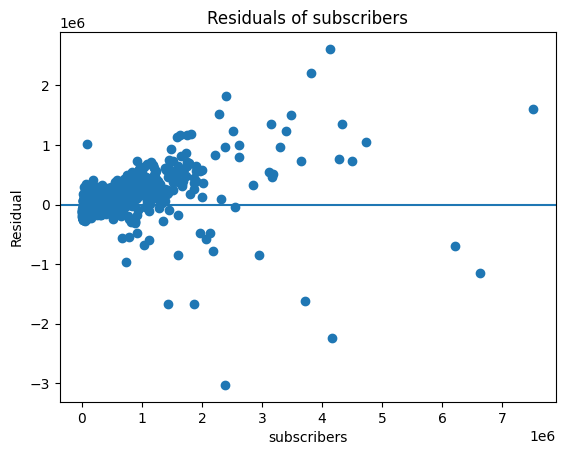

In [21]:
plt.scatter(x = df2["subscribers"], y = linear_model.resid)
plt.axhline()
plt.title("Residuals of subscribers")
plt.xlabel("subscribers")
plt.ylabel("Residual")

In [22]:
linear_model2 = smf.ols("subscribers ~ length + views + likes \
    + genre_FANTASY \
    + genre_ROMANCE \
    + genre_SLICE_OF_LIFE + genre_SUPERNATURAL \
    + genre_THRILLER  \
    + status_HIATUS",data=df2).fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subscribers   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     765.8
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:06:11   Log-Likelihood:                -24703.
No. Observations:                1777   AIC:                         4.943e+04
Df Residuals:                    1767   BIC:                         4.948e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.622e+05   1.06e+04     15.276      0.000    1.41e+05    1.83e+05
genre_FANTASY[T.True]        6.215e+04   1.73e+04      3.596      0.000    2.82e+04     9.6e+04
genre_ROMANCE[T.True]        1.027e+05   1.59e+04      6.458      0.000    7.15e+04    1.34e+05
genre_SLICE_OF_LIFE[T.True] -1.135e+05   3.44e+04     -3.295      0.001   -1.81e+05   -4.59e+04
genre_SUPERNATURAL[T.True]   1.119e+05    3.7e+04      3.028      0.002    3.94e+04    1.84e+05
genre_THRILLER[T.True]       7.769e+04   2.85e+04      2.727      0.006    2.18e+04    1.34e+05
status_HIATUS[T.True]        5.994e+04   1.93e+04      3.108      0.002    2.21e+04    9.78e+04
length                       -971.8556     74.065    -13.122      0.000   -1117.121    -826.591
views                           0.0023      0.000      8.889      0.000       0.002       0.003
likes                           0.0597      0.004     14.443      0.000       0.052       0.068
==============================================================================
Omnibus:                      648.755   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60448.131
Skew:                           0.748   Prob(JB):                         0.00
Kurtosis:                      31.534   Cond. No.                     5.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

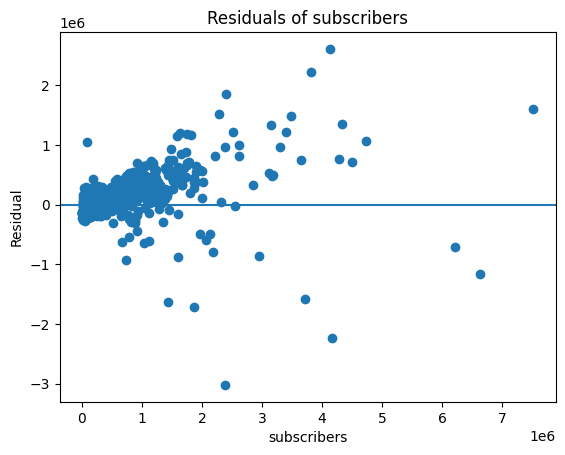

In [23]:
plt.scatter(x = df2["subscribers"], y = linear_model2.resid)
plt.axhline()
plt.title("Residuals of subscribers")
plt.xlabel("subscribers")
plt.ylabel("Residual")

In [24]:
linear_model3 = smf.ols("subscribers ~ length + views + likes",data=df2).fit()
linear_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subscribers   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     2178.
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:06:11   Log-Likelihood:                -24743.
No. Observations:                1777   AIC:                         4.949e+04
Df Residuals:                    1773   BIC:                         4.952e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.166e+05   7519.172     28.801      0.000    2.02e+05    2.31e+05
length     -1105.2359     72.097    -15.330      0.000   -1246.639    -963.832
views          0.0022      0.000      8.622      0.000       0.002       0.003
likes          0.0610      0.004     14.496      0.000       0.053       0.069
==============================================================================
Omnibus:                      667.063   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58431.067
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                      31.044   Cond. No.                     1.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

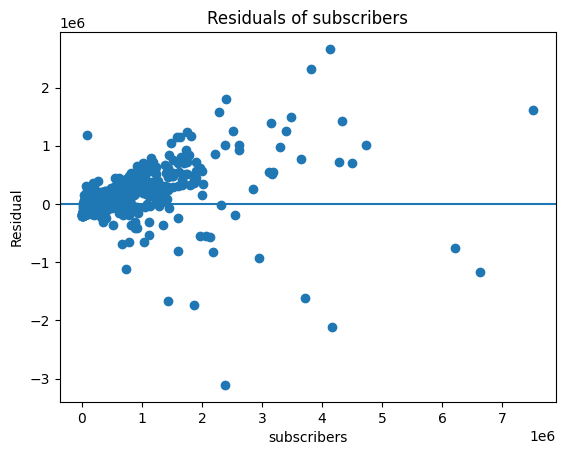

In [25]:
plt.scatter(x = df2["subscribers"], y = linear_model3.resid)
plt.axhline()
plt.title("Residuals of subscribers")
plt.xlabel("subscribers")
plt.ylabel("Residual")

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor #decision tree library
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

In [27]:
x = df2[["length", "views", "likes","genre_FANTASY","genre_ROMANCE","genre_SLICE_OF_LIFE","genre_SUPERNATURAL","genre_THRILLER","status_HIATUS"]]
y = df2["subscribers"]
tree_model5 = DecisionTreeRegressor(max_depth = 5)
tree_model5.fit(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

mse of test:  22477572218.70337
mse of training:  21434196512.83577


[Text(0.5225409836065574, 0.9166666666666666, 'x[1] <= 83136664.0\nsquared_error = 340632179062.252\nsamples = 1777\nvalue = 356517.58'),
 Text(0.26229508196721313, 0.75, 'x[1] <= 14314510.5\nsquared_error = 56750841551.927\nsamples = 1638\nvalue = 232204.263'),
 Text(0.39241803278688525, 0.8333333333333333, 'True  '),
 Text(0.13114754098360656, 0.5833333333333334, 'x[1] <= 4242784.5\nsquared_error = 8633337319.952\nsamples = 1220\nvalue = 129555.489'),
 Text(0.06557377049180328, 0.4166666666666667, 'x[1] <= 1909367.0\nsquared_error = 2107934508.614\nsamples = 745\nvalue = 78595.717'),
 Text(0.03278688524590164, 0.25, 'x[1] <= 780548.5\nsquared_error = 752730703.837\nsamples = 424\nvalue = 52364.63'),
 Text(0.01639344262295082, 0.08333333333333333, 'squared_error = 234199615.642\nsamples = 200\nvalue = 33769.365'),
 Text(0.04918032786885246, 0.08333333333333333, 'squared_error = 631312507.569\nsamples = 224\nvalue = 68967.545'),
 Text(0.09836065573770492, 0.25, 'x[1] <= 3052073.0\nsqua

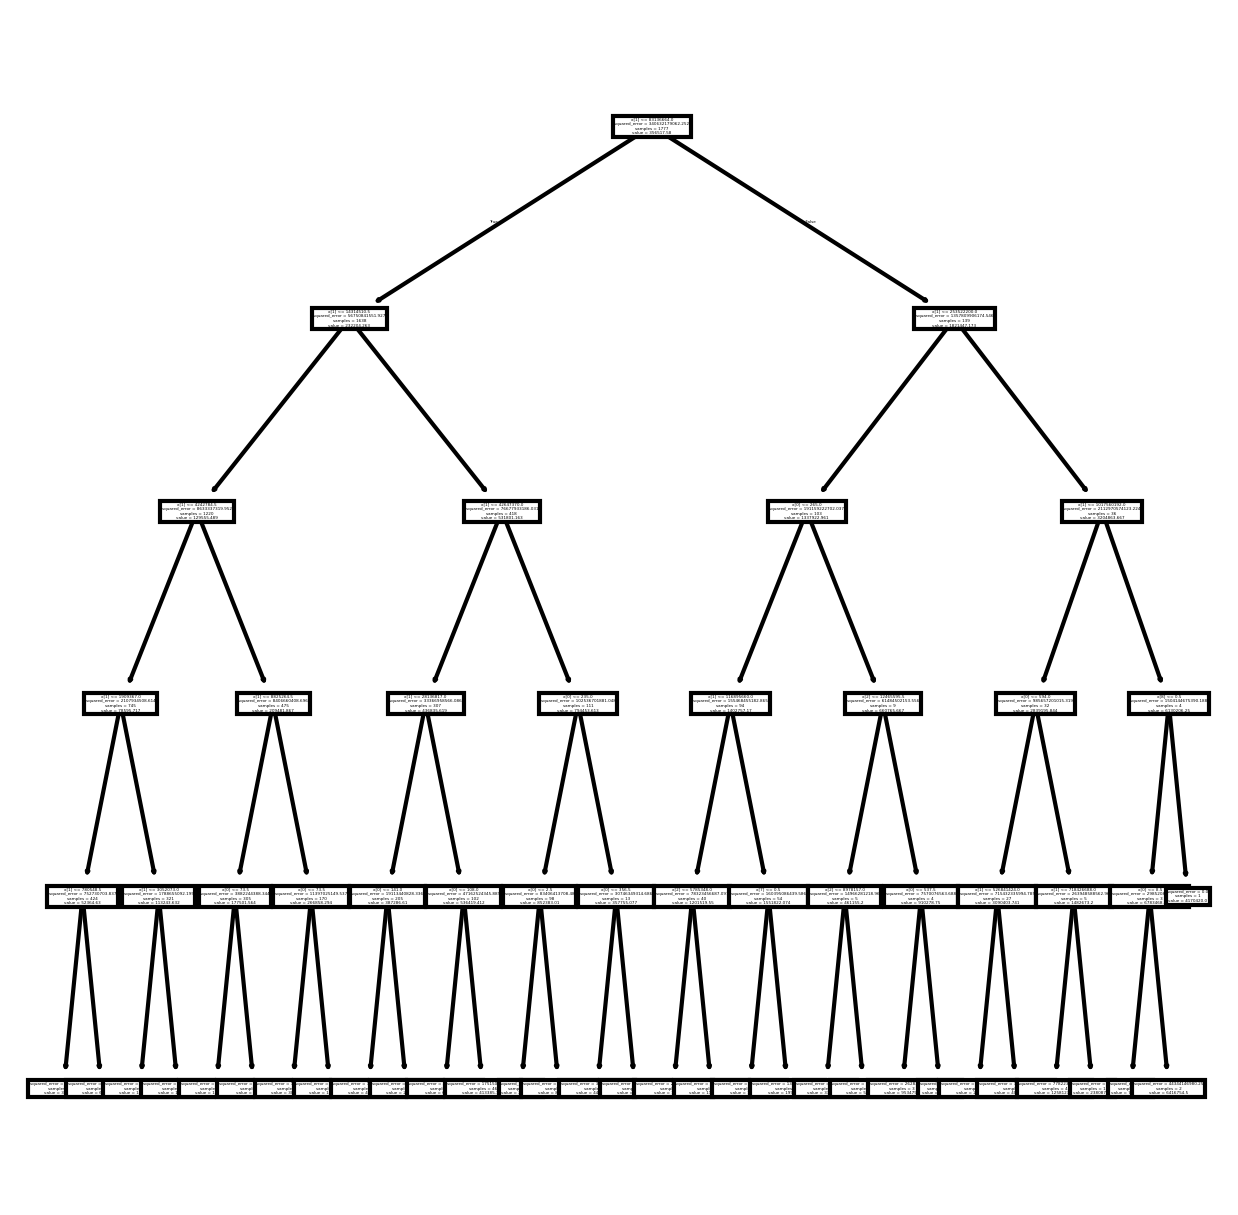

In [35]:
p5test = tree_model5.predict(x_test)
print("mse of test: ", mean_squared_error(p5test, y_test))
p5train = tree_model5.predict(x_train)
print("mse of training: ",mean_squared_error(p5train, y_train))
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(tree_model5)

mse of test:  47276803373.51715
mse of training:  44393573209.91047


[Text(0.5, 0.875, 'x[1] <= 83136664.0\nsquared_error = 340632179062.252\nsamples = 1777\nvalue = 356517.58'),
 Text(0.25, 0.625, 'x[1] <= 14314510.5\nsquared_error = 56750841551.927\nsamples = 1638\nvalue = 232204.263'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 4242784.5\nsquared_error = 8633337319.952\nsamples = 1220\nvalue = 129555.489'),
 Text(0.0625, 0.125, 'squared_error = 2107934508.614\nsamples = 745\nvalue = 78595.717'),
 Text(0.1875, 0.125, 'squared_error = 8406660408.696\nsamples = 475\nvalue = 209481.867'),
 Text(0.375, 0.375, 'x[1] <= 42647370.0\nsquared_error = 76677933186.031\nsamples = 418\nvalue = 531801.163'),
 Text(0.3125, 0.125, 'squared_error = 33366958566.086\nsamples = 307\nvalue = 436835.619'),
 Text(0.4375, 0.125, 'squared_error = 102536701881.048\nsamples = 111\nvalue = 794453.613'),
 Text(0.75, 0.625, 'x[1] <= 253522200.0\nsquared_error = 1357809906174.546\nsamples = 139\nvalue = 1821447.173'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.37

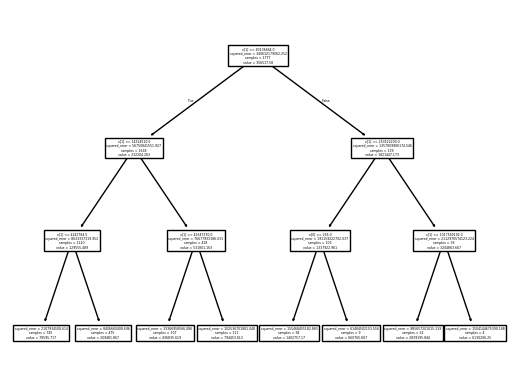

In [36]:
tree_model3 = DecisionTreeRegressor(max_depth = 3)
tree_model3.fit(x, y)
p3test = tree_model3.predict(x_test)
print("mse of test: ", mean_squared_error(p3test, y_test))
p3train = tree_model3.predict(x_train)
print("mse of training: ",mean_squared_error(p3train, y_train))
plot_tree(tree_model3)

mse of test:  3223207738.3434873
mse of training:  3086635015.374561


[Text(0.7090427740863787, 0.9545454545454546, 'x[1] <= 83136664.0\nsquared_error = 340632179062.252\nsamples = 1777\nvalue = 356517.58'),
 Text(0.4781068313953488, 0.8636363636363636, 'x[1] <= 14314510.5\nsquared_error = 56750841551.927\nsamples = 1638\nvalue = 232204.263'),
 Text(0.5935748027408638, 0.9090909090909092, 'True  '),
 Text(0.2802637043189369, 0.7727272727272727, 'x[1] <= 4242784.5\nsquared_error = 8633337319.952\nsamples = 1220\nvalue = 129555.489'),
 Text(0.16834509966777408, 0.6818181818181818, 'x[1] <= 1909367.0\nsquared_error = 2107934508.614\nsamples = 745\nvalue = 78595.717'),
 Text(0.09343853820598007, 0.5909090909090909, 'x[1] <= 780548.5\nsquared_error = 752730703.837\nsamples = 424\nvalue = 52364.63'),
 Text(0.04754983388704319, 0.5, 'x[1] <= 264272.5\nsquared_error = 234199615.642\nsamples = 200\nvalue = 33769.365'),
 Text(0.02616279069767442, 0.4090909090909091, 'x[1] <= 132668.0\nsquared_error = 97957839.309\nsamples = 69\nvalue = 21972.768'),
 Text(0.0132890

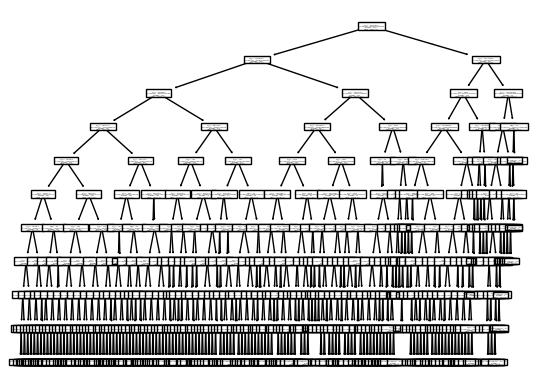

In [37]:
tree_model10 = DecisionTreeRegressor(max_depth = 10)
tree_model10.fit(x, y)
p10test = tree_model10.predict(x_test)
print("mse of test: ", mean_squared_error(p10test, y_test))
p10train = tree_model10.predict(x_train)
print("mse of training: ",mean_squared_error(p10train, y_train))
plot_tree(tree_model10)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
df2 = df2.dropna()
x2 = df2[["length", "views", "likes","genre_FANTASY","genre_ROMANCE","genre_SLICE_OF_LIFE","genre_SUPERNATURAL","genre_THRILLER","status_HIATUS"]]
y2= df2["subscribers"]
x.head(1)

,length,views,likes,genre_FANTASY,genre_ROMANCE,genre_SLICE_OF_LIFE,genre_SUPERNATURAL,genre_THRILLER,status_HIATUS
0,3,35868,2117,False,True,False,False,False,False


mse of test:  67771654425.601494
mse of training:  47673944249.734276


Text(0, 0.5, 'True Subscribers - Predicted Subscribers')

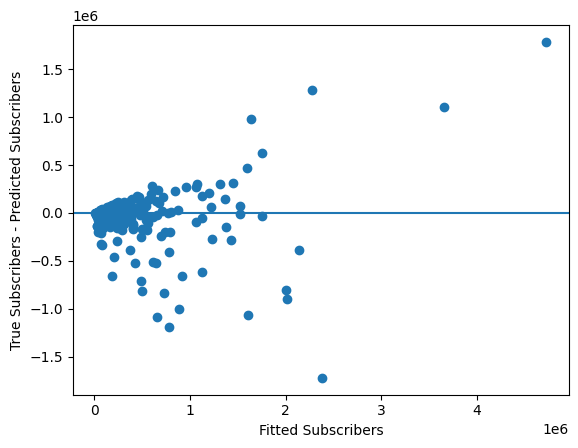

In [31]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state = 42)
knn7 = KNeighborsRegressor(n_neighbors = 7)
knn7.fit(x2_train, y2_train)
y_test_pred7 = knn7.predict(x2_test)
print("mse of test: ", mean_squared_error(y_test_pred7, y2_test))
y_train_pred7 = knn7.predict(x2_train)
print("mse of training: ",mean_squared_error(y_train_pred7, y2_train))
plt.scatter(y2_test, y2_test - y_test_pred7)
plt.axhline()
plt.xlabel("Fitted Subscribers")
plt.ylabel("True Subscribers - Predicted Subscribers")


mse of test:  61050140700.84133
mse of training:  47999175140.74855


Text(0, 0.5, 'True Subscribers - Predicted Subscribers')

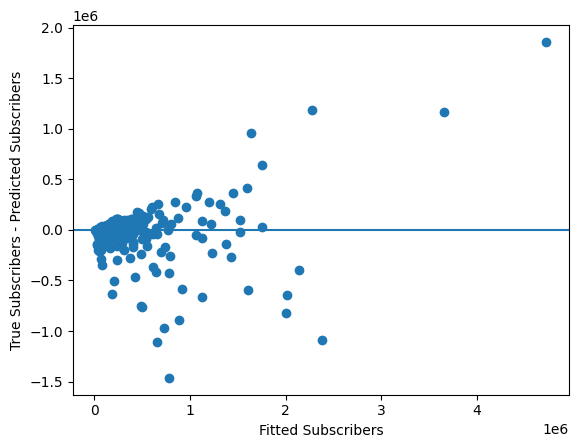

In [32]:
knn10 = KNeighborsRegressor(n_neighbors = 10)
knn10.fit(x2_train, y2_train)
y_test_pred10 = knn10.predict(x2_test)
print("mse of test: ", mean_squared_error(y_test_pred10, y2_test))
y_train_pred10 = knn10.predict(x2_train)
print("mse of training: ",mean_squared_error(y_train_pred10, y2_train))
plt.scatter(y2_test, y2_test - y_test_pred10)
plt.axhline()
plt.xlabel("Fitted Subscribers")
plt.ylabel("True Subscribers - Predicted Subscribers")

mse of test:  61819484346.8489
mse of training:  41510484599.21825


Text(0, 0.5, 'True Subscribers - Predicted Subscribers')

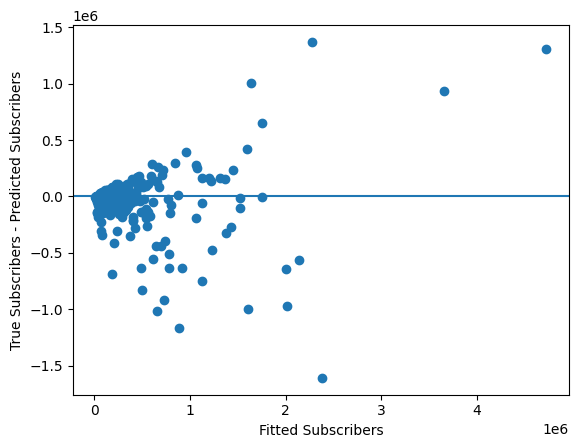

In [33]:
knn5 = KNeighborsRegressor(n_neighbors = 5)
knn5.fit(x2_train, y2_train)
y_test_pred5 = knn5.predict(x2_test)
print("mse of test: ", mean_squared_error(y_test_pred5, y2_test))
y_train_pred5 = knn5.predict(x2_train)
print("mse of training: ",mean_squared_error(y_train_pred5, y2_train))
plt.scatter(y2_test, y2_test - y_test_pred5)
plt.axhline()
plt.xlabel("Fitted Subscribers")
plt.ylabel("True Subscribers - Predicted Subscribers")